In [ ]:
#importing required libraries

import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving master 4.csv to master 4.csv


In [ ]:
#Loading data into dataframe

data = pd.read_csv("/content/master 4.csv")
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


## **2. Familiarizing with Data:**

In this step, few dataframe methods are used to look into the data and its features.

In [ ]:
#Shape of dataframe

data.shape

(27820, 12)

In [ ]:
#Listing the features of the dataset

data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [ ]:
#Renaming the columns names for convinience

data.columns = ['country', 'year', 'gender', 'age_group', 'suicide_count', 'population', 'suicide_rate', 'country-year', 'HDI for year',
                'gdp_for_year', 'gdp_per_capita', 'generation']
data.columns

Index(['country', 'year', 'gender', 'age_group', 'suicide_count', 'population',
       'suicide_rate', 'country-year', 'HDI for year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [ ]:
#Renaming the columns names for convinience

data.columns = ['country', 'year', 'gender', 'age_group', 'suicide_count',
                'population', 'suicide_rate', 'country-year', 'HDI for year',
                'gdp_for_year', 'gdp_per_capita', 'generation']
data.columns

Index(['country', 'year', 'gender', 'age_group', 'suicide_count', 'population',
       'suicide_rate', 'country-year', 'HDI for year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [ ]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   gender          27820 non-null  object 
 3   age_group       27820 non-null  object 
 4   suicide_count   27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicide_rate    27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   HDI for year    8364 non-null   float64
 9   gdp_for_year    27820 non-null  object 
 10  gdp_per_capita  27820 non-null  int64  
 11  generation      27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [ ]:
data.age_group.value_counts()

15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: age_group, dtype: int64

In [ ]:
data.generation.value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

### **Observations:**
* `HDI for year` column has missing values. None of the other columns have any missing values. So considering to remove HDI from the dataset.
* The age feature has 6 unique age groups
* `Age` is grouped into year buckets as categorical format which needs to be encoded.
* `Gender` should be encoded.
* Scale required numerical features.
* The generation feature has 6 types of generations.
* `Generation` could be encoded as well.

#### Let's see how many countries are avaialble in the dataset:

In [ ]:
#Listing countries

country = data.country.unique()
print("Number of countries:", len(country))
country

Number of countries: 101


array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

## **3. Visualizing the data:**

Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'suicide_count'}>],
       [<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'suicide_rate'}>],
       [<Axes: title={'center': 'HDI for year'}>,
        <Axes: title={'center': 'gdp_per_capita'}>]], dtype=object)

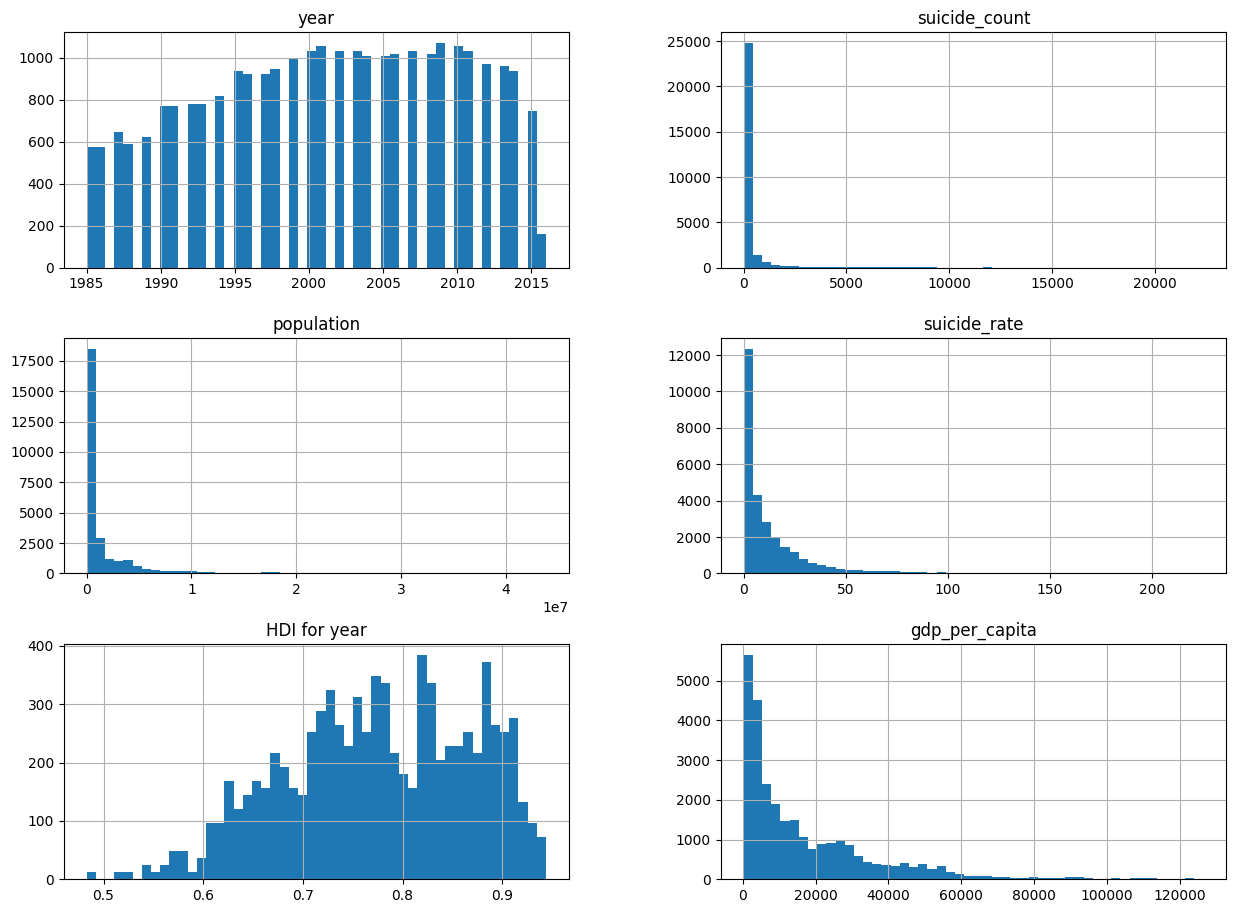

In [ ]:
data.hist(bins = 50,figsize = (15,11))

## **4. Data Preprocessing & EDA:**

Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [ ]:
data.describe()

,year,suicide_count,population,suicide_rate,HDI for year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [ ]:
#checking the data for null or missing values

data.isnull().sum()

country               0
year                  0
gender                0
age_group             0
suicide_count         0
population            0
suicide_rate          0
country-year          0
HDI for year      19456
gdp_for_year          0
gdp_per_capita        0
generation            0
dtype: int64

From the above stats, it is clear that the column, `HDI for year` has 19456 null values out of 27820 samples which is approximately 70% of the column. This may tamper the model performance so, dropping the `HDI for year` column from the dataset.

In [ ]:
#dropping the HDI for year column

data = data.drop(['HDI for year'], axis = 1)
data.shape

(27820, 11)

In [ ]:
data.columns

Index(['country', 'year', 'gender', 'age_group', 'suicide_count', 'population',
       'suicide_rate', 'country-year', 'gdp_for_year', 'gdp_per_capita',
       'generation'],
      dtype='object')

The column country-year is just a combination of country and year columns. So dropping that column.

In [ ]:
#dropping the country-year for year column

data = data.drop(['country-year'], axis = 1)
data.shape

(27820, 10)

Now we are going further with 10 features which also include the target column. For further assurance, lets drop all the null rows from the dataset.

In [ ]:
#droppinf off any null rows (is any)

data = data.dropna()
data.shape

(27820, 10)

The non-numerical labeled columns, country, year, gender, age_group and generation are to be converted to numerical labels that can be don by using SkLearn's LabelEncoder.

In [ ]:
#encoding the categorical features with LabelEncoder

from sklearn.preprocessing import LabelEncoder
categorical = ['country', 'year','age_group', 'gender', 'generation']
le = sklearn.preprocessing.LabelEncoder()

for column in categorical:
    data[column] = le.fit_transform(data[column])

In [ ]:
#creating a copy of dataset for statistical test

stat_data = data.copy()
stat_data

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,0,2,1,0,21,312900,6.71,"2,156,624,900",796,2
1,0,2,1,2,16,308000,5.19,"2,156,624,900",796,5
2,0,2,0,0,14,289700,4.83,"2,156,624,900",796,2
3,0,2,1,5,1,21800,4.59,"2,156,624,900",796,1
4,0,2,1,1,9,274300,3.28,"2,156,624,900",796,0
...,...,...,...,...,...,...,...,...,...,...
27815,100,29,0,2,107,3620833,2.96,"63,067,077,179",2309,2
27816,100,29,0,5,9,348465,2.58,"63,067,077,179",2309,5
27817,100,29,1,3,60,2762158,2.17,"63,067,077,179",2309,3
27818,100,29,0,3,44,2631600,1.67,"63,067,077,179",2309,3


Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data. So, the numerical columns, `population`, `gdp_for_year` & `gdp_per_capita` are being standardized using SkLearn's RobustScalar.

In [ ]:
#Checking the data type of each column

data.dtypes

country             int64
year                int64
gender              int64
age_group           int64
suicide_count       int64
population          int64
suicide_rate      float64
gdp_for_year       object
gdp_per_capita      int64
generation          int64
dtype: object

In [ ]:
# Converting the column 'gdp_for_year' to float from object

data['gdp_for_year'] = data['gdp_for_year'].str.replace(',','').astype(float)

In [ ]:
#Scaling the numerical data columns with RobustScalar

numerical = ['suicide_count', 'population', 'suicide_rate',
              'gdp_for_year','gdp_per_capita']

from sklearn.preprocessing import RobustScaler

rc = RobustScaler()
data[numerical] = rc.fit_transform(data[numerical])

In [ ]:
data

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,0,2,1,0,-0.031250,-0.084435,0.045860,-0.182942,-0.400243,2
1,0,2,1,2,-0.070312,-0.087963,-0.050955,-0.182942,-0.400243,5
2,0,2,0,0,-0.085938,-0.101142,-0.073885,-0.182942,-0.400243,2
3,0,2,1,5,-0.187500,-0.294064,-0.089172,-0.182942,-0.400243,1
4,0,2,1,1,-0.125000,-0.112232,-0.172611,-0.182942,-0.400243,0
...,...,...,...,...,...,...,...,...,...,...
27815,100,29,0,2,0.640625,2.297696,-0.192994,0.059520,-0.329631,2
27816,100,29,0,5,-0.125000,-0.058824,-0.217197,0.059520,-0.329631,5
27817,100,29,1,3,0.273438,1.679341,-0.243312,0.059520,-0.329631,3
27818,100,29,0,3,0.148438,1.585323,-0.275159,0.059520,-0.329631,3


## **Splitting the Data:**

The data is split into train & test sets, 80-20 split.

In [ ]:
# Sepratating & assigning features and target columns to X & y

y = data['suicide_rate']
X = data.drop('suicide_rate',axis=1)
X.shape, y.shape

((27820, 9), (27820,))

In [ ]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((22256, 9), (5564, 9))

In [ ]:
#importing required libraries
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []
rmse_train = []
rmse_test = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    acc_train.append(round(a, 3))
    acc_test.append(round(b, 3))
    rmse_train.append(round(c, 3))
    rmse_test.append(round(d, 3))

### **k-Nearest Neighbors Regression:**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;K nearest neighbors is a simple algorithm that stores all available cases and predict the numerical target based on a similarity measure (e.g., distance functions). A simple implementation of KNN regression is to calculate the average of the numerical target of the k nearest neighbors.

In [ ]:
# KNN Regression model
from sklearn.neighbors import KNeighborsRegressor

# instantiate the model
knn = KNeighborsRegressor()

param_grid = {'n_neighbors':list(range(1, 31)), 'weights': ['uniform', 'distance']}

# instantiate the grid
knn_grid = GridSearchCV(knn, param_grid , cv=10)

# fit the model
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']})

In [ ]:
#Checking the best parameters for the model
knn_para = knn_grid.best_params_
print(knn_para)

{'n_neighbors': 1, 'weights': 'uniform'}


In [ ]:
#predicting the target value from the model for the samples
y_train_knn = knn_grid.predict(X_train)
y_test_knn = knn_grid.predict(X_test)

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_knn = knn_grid.score(X_train, y_train)
acc_test_knn = knn_grid.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_knn))
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_knn))

print("KNN: Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("KNN: Accuracy on test Data: {:.3f}".format(acc_test_knn))
print('\nKNN: The RMSE of the training set is:', rmse_train_knn)
print('KNN: The RMSE of the testing set is:', rmse_test_knn)

KNN: Accuracy on training Data: 1.000
KNN: Accuracy on test Data: 0.812

KNN: The RMSE of the training set is: 0.0
KNN: The RMSE of the testing set is: 0.5358202421806745


**Storing Results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('k-Nearest Neighbors Regression', acc_train_knn, acc_test_knn, rmse_train_knn, rmse_test_knn)

Evaluating training and testing set performance with different numbers of neighbors from 1 to 30. The plot shows the training and test set accuracy on the y-axis against the setting of
n_neighbors on the x-axis.

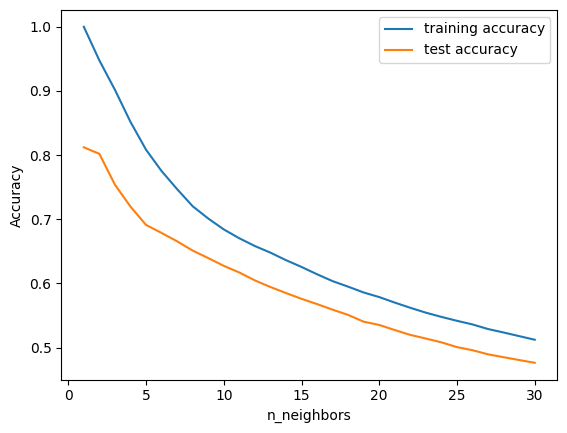

In [ ]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 20
neighbors_settings = range(1, 31)
for n in neighbors_settings:
    # fit the model
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))

#plotting the training & testing accuracy for n_neighbours from 1 to 30
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

**OBSERVATIONS:** This discrepancy between performance on the training set and the testing set fro n_neighbors < 5 is a clear sign of overfitting. After that, the perfromance is not so great so, moving on to the other models.